In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1.Open the categoricals variable we created before.

In [2]:
customer_df=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv", sep=",")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
customer_df.columns = [customer_df.columns[i].lower().replace(' ','_') for i in range(len(customer_df.columns))]
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
# effective_to_date column is object and i will change it to datetime.
customer_df['effective_to_date'] = customer_df['effective_to_date'].astype('datetime64[ns]')

In [7]:
# We dont need customer_id as its unique for each customer.
customer_df=customer_df.drop(["customer"], axis=1)

In [8]:
categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2.Plot all the categorical variables with the proper plot. What can you see?


<AxesSubplot:xlabel='vehicle_size', ylabel='total_claim_amount'>

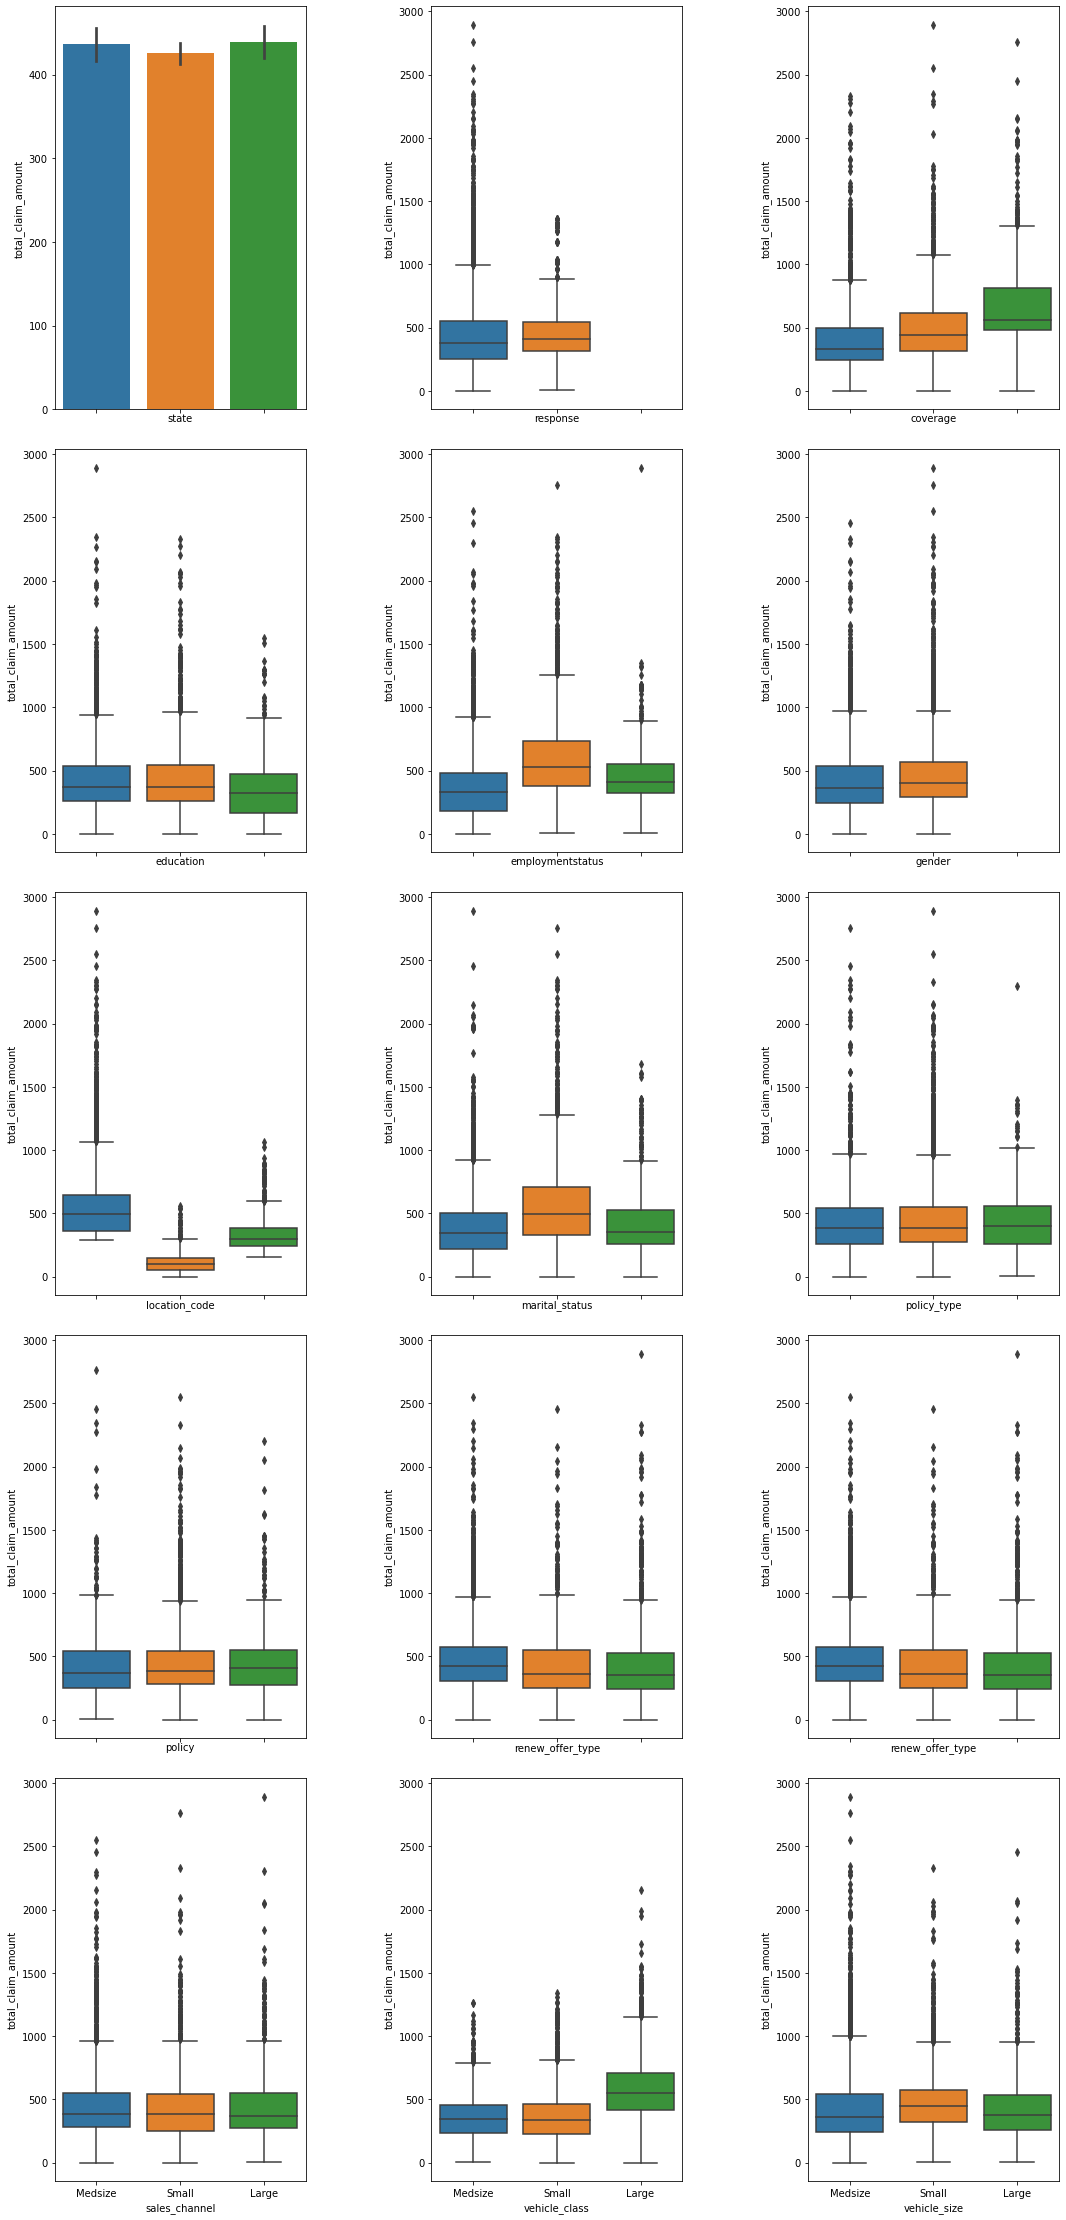

In [11]:
fig, axes = plt.subplots(5, 3, sharex=True, figsize=(18,40))

fig.subplots_adjust(hspace=0.1, wspace=.5) 

sns.barplot(ax=axes[0, 0], data=customer_df, x="state", y="total_claim_amount")
sns.boxplot(ax=axes[0, 1], data=customer_df, x="response", y="total_claim_amount")
sns.boxplot(ax=axes[0, 2], data=customer_df, x="coverage", y="total_claim_amount")
sns.boxplot(ax=axes[1, 0], data=customer_df, x="education", y="total_claim_amount")
sns.boxplot(ax=axes[1, 1], data=customer_df, x="employmentstatus", y="total_claim_amount")
sns.boxplot(ax=axes[1, 2], data=customer_df, x="gender", y="total_claim_amount")
sns.boxplot(ax=axes[2, 0], data=customer_df, x="location_code", y="total_claim_amount")
sns.boxplot(ax=axes[2, 1], data=customer_df, x="marital_status", y="total_claim_amount")
sns.boxplot(ax=axes[2, 2], data=customer_df, x="policy_type", y="total_claim_amount")
sns.boxplot(ax=axes[3, 0], data=customer_df, x="policy", y="total_claim_amount")
sns.boxplot(ax=axes[3, 1], data=customer_df, x="renew_offer_type", y="total_claim_amount")
sns.boxplot(ax=axes[3, 2], data=customer_df, x="renew_offer_type", y="total_claim_amount")
sns.boxplot(ax=axes[4, 0], data=customer_df, x="sales_channel", y="total_claim_amount")
sns.boxplot(ax=axes[4, 1], data=customer_df, x="vehicle_class", y="total_claim_amount")
sns.boxplot(ax=axes[4, 2], data=customer_df, x="vehicle_size", y="total_claim_amount")

### 4. Plot time variable. Can you extract something from it?


In [12]:
customer_df.effective_to_date.value_counts()

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-03    178
2011-01-31    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-02-27    167
2011-01-05    167
2011-01-11    166
2011-02-04    164
2011-02-28    161
2011-02-10    161
2011-01-21    160
2011-01-29    160
2011-01-02    160
2011-02-03    158
2011-02-22    158
2011-02-05    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-01-18    154
2011-02-01    154
2011-01-15    153
2011-01-14    152
2011-02-11    151
2011-01-25    151
2011-01-07    151
2011-01-08    149
2011-02-18    149
2011-02-02    149
2011-02-25    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-30    145
2011-01-13    145
2011-02-06    144
2011-02-23    143
2011-01-06    143
2011-01-16    142
2011-02-13    139
2011-02-16    139
2011-02-24    139
2011-02-09    137
2011-01-22    136
2011-02-17    136
2011-02-08    134
2011-02-20

In [15]:
# All actions are either in January or February therefore we can extract the month and plot a graph with the column 'month'.

In [13]:
customer_df['month'] = pd.DatetimeIndex(customer_df['effective_to_date']).month

<AxesSubplot:>

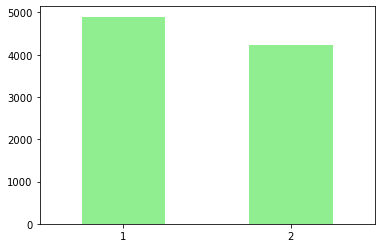

In [14]:
customer_df['month'].value_counts().plot.bar(rot=0, color='lightgreen')